In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/tmp/ipykernel_127386/425525964.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


**Programming Course** - ***Master 1 PSL - Science et Génie des Matériaux / Énergie*** 

---------------

# Introduction to Numpy

**Basile Marchand (Centre des Matériaux- Mines ParisTech / CNRS / PSL University)**

<div>
<a href="https://twitter.com/BasileMarchand?ref_src=twsrc%5Etfw" class="twitter-follow-button" data-size="large" data-text="Follow me on Twitter" data-show-count="false">Follow @BasileMarchand</a><script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
</div>

## Numpy

NumPy is a Python module allowing to work with multidimensional arrays. Indeed Python does not have natively notions of arrays and therefore by extension even less notions of matrices. 

It is therefore necessary to use a particular module, which is not a module of the standard Python library. **The** recommended module for multidimensional array manipulation (including matrices) is **NumPy**. 

As a proof of the recognition of this module as well as of its performance it is worth mentioning that it is the module that is used in almost all other scientific modules available in Python. The secret of the NumPy module is that for performance reasons it is not developed in Python but in C++.

Of course the use of this module is done in the classic way: 

```python
import numpy
```

However, for simplicity's sake you will almost always see the import done by giving an alias to numpy :

```python
import numpy as np
```

The basic object in NumPy, the one we will manipulate later, is the **np.ndarray**. An **np.ndarray** numpy is a multidimensional array of the same type (you can't mix integer, float and string in the same **np.ndarray** for example). We call *rank* of the **np.ndarray** the number of dimensions of the latter: 
* *rank of 1* : array with 1 dimension thus a line of M columns
* *rank of 2* : array with 2 dimension thus N lines and M columns
* *rank of 3* : array with three dimensions (a paving stone in space) 
* etc 

And the shape of the *array*, *shape* in English, is an N-tuple which characterizes the size of the array according to each of its dimensions. For example:
* A row vector of size **N** corresponds to an **array** with rank=1 and shape=(N,)
* A column vector of size **N** corresponds to an **array** with rank=2 and shape=(1,N)
* A rectangular matrix **NxM** corresponds to an **array** with rank=2 and shape=(N,M)
* A square hypermatrix **NxNxN** corresponds to an **array** with rank=3 and shape=(N,N,N)

### Creating an **array**

The definition of an `np.ndarray` from a set of values is done by using `np.array` in the following way:

In [2]:
import numpy as np
a_matrix_3_3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(f"a 3x3 matrix : \n{a_matrix_3_3}")
a_vector_column = np.array([[1,], [2,], [3,]]) 
print(f"a column vector : \n{a_vector_column}")
a_vector_line = np.array([1,2,3])
print(f"a row vector : \n{a_vector_line}")
an_array_3_dimension = np.array( [[[1,2,3],[2,5,6]], [[11,12,13],[14,15,16]]])
print(f"a 3 dimensional array :\n{an_array_3_dimension}")

a 3x3 matrix : 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
a column vector : 
[[1]
 [2]
 [3]]
a row vector : 
[1 2 3]
a 3 dimensional array :
[[[ 1  2  3]
  [ 2  5  6]]

 [[11 12 13]
  [14 15 16]]]


To know the rank and the shape of a NumPy **array** you just have to proceed as follows:

In [3]:
shape = a_vector_column.shape 
rank = a_vector_column.ndim 
print("shape = {}".format(shape))
print("rank = {}".format(rank))

shape = (3, 1)
rank = 2


Moreover, to know the number of elements contained in a `np.array` you just have to access the size attribute of the latter. For example :

In [4]:
nElement = a_vector_column.size
print(f"size = {nElement}")

size = 3


In order to initialize an **array** NumPy has a number of functions to create arrays. 
* `np.zeros` which allows to create an array containing only zeros
* `np.zeros_like` which allows to build a matrix of zeros having the same shape as another matrix given as input.
* `np.ones` which creates an array containing only ones.
* `np.eye` which creates an identity array.
* `np.random.rand` which creates a matrix with random values.

Below are examples of how to use each of these functions.

In [5]:
print("np.zeros")
print(np.zeros((2,4)))
print("np.ones")
print(np.ones((5,1)))
print("np.zeros_like")
m = np.ones((2,3))
print(np.zeros_like(m))
print("np.eye")
print(np.eye(4))
print("np.random.rand")
print(np.random.rand(3,5))

np.zeros
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
np.ones
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
np.zeros_like
[[0. 0. 0.]
 [0. 0. 0.]]
np.eye
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
np.random.rand
[[0.32115229 0.49376662 0.69948405 0.2243675  0.50560415]
 [0.8781221  0.28372339 0.9988285  0.09940989 0.83454571]
 [0.09895151 0.08313705 0.00458943 0.63326481 0.86652427]]


### A word about `np.matrix`

There is an object of type `matrix` in numpy. At first sight it would be tempting to think that this is the ideal thing for target applications in pre-prep. Well no, it's a false good idea! Don't use `np.matrix` because it will only introduce weird bugs in the codes.

### A word about what C++ imposes on us behind numpy

In [6]:
array = np.random.rand(10)
print(f"array = {array}")

array = [0.33876323 0.22514646 0.1477305  0.06744456 0.3757398  0.5961389
 0.70859954 0.85553278 0.78602837 0.26099642]


In [7]:
array[0] = int(10)
print(f"array = {array}")

array = [10.          0.22514646  0.1477305   0.06744456  0.3757398   0.5961389
  0.70859954  0.85553278  0.78602837  0.26099642]


In [8]:
try:
    array[0] = "Hello"
except Exception as e: 
    print(e.args[0])

could not convert string to float: 'Hello'


And yes the `np.array` are not like Python lists, they are homogeneous containers. You can't store values of different types in them, `numpy` will always try to convert what you give it into the array type.

This behavior may seem strange, given the dynamically typed nature of Python ! But I remind you that NumPy is not developed in Python but in C++. But C++ is a statically typed language. This is the price to pay for performance! So each `np.ndarray` is associated with a type. To know the type of the elements you just have to access the `dtype` attribute. For example:

In [9]:
array.dtype

dtype('float64')

You can see that the type of values that can be contained in the array is `float64` which corresponds to a double precision float (coded on 64 bits). So all the elements that we want to put in the array will be converted to `float64`. If this conversion is not possible we get an error!

It is possible to change the type `np.ndarray` for that it is enough to use the method `astype`. For example if I want to convert the array `tableau` which contains only `float64` into an array containing `int32` it is enough to proceed as follows:

In [10]:
arrayInt = array.astype(np.int32)
print(f"arrayInt = {arrayInt}")

arrayInt = [10  0  0  0  0  0  0  0  0  0]


In [11]:
arrayInt.dtype

dtype('int32')

Then you notice that most of the values become `0`. This is because converting a float64 to an integer is done by simply truncating!

Of course it is possible when creating an `np.ndarray` to specify the type of element you want, which bypasses the type deduction mechanism of numpy. For example, if we create an array from a list containing only integers.

In [12]:
array_no_type = np.array([1,2,3,4])
print(f"type = {array_no_type.dtype}")

type = int64


Numpy automatically deduces an `int64` type.

But if I want to have `float64` how do I do it ? The stupid and nasty solution is to put dots in the list that I provide as input, for example :

In [13]:
array_no_type = np.array([1.,2.,3.,4.])
array_no_type.dtype

dtype('float64')

By the way a remark, if I put only a dot in the list at the first element for example numpy will still consider `float64`. Because in the presence of a heterogeneous list NumPy will take the highest level type, in this case `float64`.

In [14]:
array_no_type = np.array([1.,2,3,4])
array_no_type.dtype

dtype('float64')

The other slightly more elegant solution is to specify the type of the `np.ndarray` via the optional `dtype` argument of `np.array`. For example:

In [15]:
array_typed = np.array([1,2,3,4], dtype=np.float64)
array_typed.dtype

dtype('float64')

In [16]:
array_typed[0] = 10.6
array_typed

array([10.6,  2. ,  3. ,  4. ])

### Mathematical operations and vectorization

NumPy allows you to create multidimensional arrays, as we have just seen. But once the table with data is created, it is necessary to be able to apply treatments to these data. Of course NumPy is there for that too!

To start with the basic operations `+`, `-`, `*`, `/` are all available in numpy.

There are two cases to consider: 

1. Operation between two `np.ndarray` : **the operations are term to term, including for `*`**
2. Operation between an `np.ndarray` and a number

For example:

In [17]:
a = np.array([[1,2,3],[4,5,6]], dtype=np.float64)
b = np.array([[1,2,3],[4,5,6]], dtype=np.float64)

In [18]:
a + b 

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [19]:
a - b 

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
a * b

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [21]:
a / b 

array([[1., 1., 1.],
       [1., 1., 1.]])

**Broadcasting** 

NumPy for basic operations has a behavior that may seem strange to you when the two `np.ndarray` do not have matching `shape`. This is called broadcasting! If I sum a `2,3` array and a `3,` array, logically we would say that it must not work. But in reality:

In [22]:
c = np.array([1,2,3], dtype=np.float64)

In [23]:
print(f"{a=}")
print(f"{c=}")
a + c

a=array([[1., 2., 3.],
       [4., 5., 6.]])
c=array([1., 2., 3.])


array([[2., 4., 6.],
       [5., 7., 9.]])

Numpy has in effect replaced the array `c=np.array([1,2,3])` by `np.array([[1,2,3], [1,2,3]])`. This behavior works for all basic operations

In [24]:
a / c

array([[1. , 1. , 1. ],
       [4. , 2.5, 2. ]])

In [25]:
d = np.array([[1.,], [2.,]])

In [26]:
a + d

array([[2., 3., 4.],
       [6., 7., 8.]])

It is this `broadcasting` that also allows us to do the basic operations between an `np.ndarray` and a number. For example:

In [27]:
2. * a 

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [28]:
2 + a

array([[3., 4., 5.],
       [6., 7., 8.]])

In [29]:
2 / a 

array([[2.        , 1.        , 0.66666667],
       [0.5       , 0.4       , 0.33333333]])

In [30]:
a / 2. 

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

**The special case of the matrix product**

The question you are probably asking yourself is but can numpy do a matrix product as we teach it to our prep school students?

Don't worry, the answer is YES ! It's just that the matrix product between two `np.ndarray` which would have the right sizes is not symbolized by the `*` operator but by `np.dot` or `@`.

For example:

In [31]:
a = np.random.rand(4,2)
b = np.random.rand(2,5)

In [32]:
a @ b 

array([[0.20908365, 0.31136876, 0.86303555, 0.31845931, 0.2879681 ],
       [0.71982047, 0.50972344, 0.84335463, 0.76717688, 0.4179944 ],
       [0.45265308, 0.44934967, 1.01784862, 0.55785474, 0.39422503],
       [0.59022932, 0.54158917, 1.1594244 , 0.70144803, 0.46882983]])

In [33]:
np.dot(a, b)

array([[0.20908365, 0.31136876, 0.86303555, 0.31845931, 0.2879681 ],
       [0.71982047, 0.50972344, 0.84335463, 0.76717688, 0.4179944 ],
       [0.45265308, 0.44934967, 1.01784862, 0.55785474, 0.39422503],
       [0.59022932, 0.54158917, 1.1594244 , 0.70144803, 0.46882983]])

In the same way, to make a matrix-vector product, which is nothing else than the product of an array $Ntimes N$ by a matrix $Ntimes 1$, we proceed as follows:

In [34]:
v = np.random.rand(2,1)

a@v

array([[0.36897367],
       [0.93679964],
       [0.66550232],
       [0.8414754 ]])

**The transpose of an array 

Another essential element of matrix calculation is the transpose. Of course, Numpy has foreseen everything. To compute the transpose of an `np.ndarray` you just have to proceed as follows:

In [35]:
a = np.random.rand(2,4)
a

array([[0.96491959, 0.89512764, 0.47323461, 0.63153701],
       [0.65014771, 0.85114634, 0.84049982, 0.61118797]])

In [36]:
b1 = a.T
b1

array([[0.96491959, 0.65014771],
       [0.89512764, 0.85114634],
       [0.47323461, 0.84049982],
       [0.63153701, 0.61118797]])

In [37]:
b2 = np.transpose(a)
b2 

array([[0.96491959, 0.65014771],
       [0.89512764, 0.85114634],
       [0.47323461, 0.84049982],
       [0.63153701, 0.61118797]])

Beware the transpositon operation only applies to `np.ndarray` of rank greater than or equal to 2. For example the transpose of a "row vector" does not give a column vector :

In [38]:
v = np.random.rand(4)
print(f"v = {v}")
vt = v.T
print(f"vt = {vt}")

v = [0.06016877 0.9835177  0.33126502 0.82118331]
vt = [0.06016877 0.9835177  0.33126502 0.82118331]


### More complex operations

Of course the operations `+`, `-`, `*`, `/` are not the only ones available. All classical mathematical functions are defined in numpy. 

* `np.cos`, `np.sin`, `np.tan`
* `np.arccos`, `np.arcsin`, `np.arctan`
* `np.degrees`, `np.radians`, `np.exp`, `np.arcsin`, `np.arctan`.
* `np.exp`, `np.log`

The interest of these functions, which all exist in the `math` module of Python, is that they are made to work on `np.ndarray`.

For example if we evaluate the function $\sin x$.

In basic Python we would do something like this

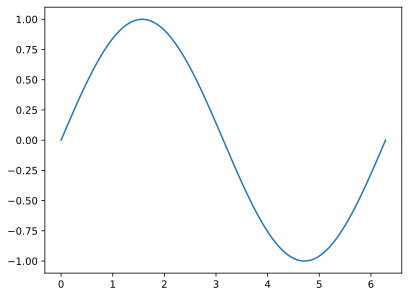

In [39]:
import math
nStep = 100
x = [ 2*math.pi*i/nStep for i in range(nStep+1)]
y = [ math.sin(x_i) for x_i in x]

import matplotlib.pyplot as plt 
plt.plot(x,y)
plt.show()

While using NumPy we can directly write:

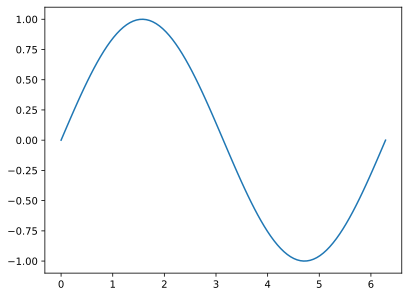

In [40]:
xNumpy = np.linspace(0, 2*np.pi, nStep)
yNumpy = np.sin(xNumpy)
plt.plot(xNumpy,yNumpy)
plt.show()

There are two advantages to the Numpy approach: 

1. It is simpler to code and more pleasant to read afterwards 
2. It is much more powerful

In [41]:
%timeit [math.sin(x_i) for x_i in x]

5.02 µs ± 63.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [42]:
%timeit np.sin(xNumpy)

325 ns ± 3.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


So there is a factor of 4 between the basic Python version and the NumPy version, and I can assure you that things get much worse when we move on to real problems!

You may wonder why it goes 4 times faster!? It's simply because on one side you do the loop in the Python world while on the other side the loop is done in the Numpy world so C++.

In the broad outline hidden behind all this is the fact that the numpy arrays are actually allocated in memory contiguously, it's `double*`. And so c++ does a great job of going through the entire array and applying a function to all the elements. Whereas Python has more trouble because it doesn't presuppose a memory alignment and therefore spends its time doing indirections.

__The basic rule to remember is that when manipulating numpy arrays you should **never** make loops__.

If you want to apply a "personal" function to an `np.ndarray` it is possible by using the `np.vectorize` function to vectorize your function.

In [43]:
def my_function(x):
    if x < 0.5:
        return x 
    else:
        return -x

Without vectorization you would have to do something like:

In [44]:
data = np.random.rand(10,20,30)

In [45]:
%%timeit
for i,x in enumerate(data):
    for j, y in enumerate(x): 
        for k, z in enumerate(y): 
            data[i,j,k] = my_function(z)

1.25 ms ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Whereas if we vectorize the `my_function` function this not very nice triple loop comes down to something much nicer :

In [46]:
my_function_vect = np.vectorize(my_function)

%timeit my_function_vect(data)

382 µs ± 6.35 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


So we observe a significant gain at runtime and most importantly the code is much more pleasant to read.

### Array manipulation

So far we have seen how to define `np.ndarray` and how to use these arrays to make more or less complex evaluations. This is good but it is not enough to cover 100% of the needs. In many cases we need to be able to access particular values of an array.

The manipulation of the NumPy `np.ndarray` and in particular the access to the values contained in the latter is done in the same spirit as the access to the elements of a list with the difference that one must specify for an `np.ndarray` several indexes since it is a multidimensional array. 

> **Attention :**  
> As for lists and tuples, the numbering of indices starts at **0**.

In [47]:
an_array = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
print(f"The array :\n {an_array=}")

The array :
 an_array=array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])


Accessing the elements of an np.ndarray is done in the same way as accessing the values of a list, namely by using the `[]` operator. The subtlety is that the `[]` operator of an `np.ndarray` can take as input several indices.

In [48]:
a_12 = an_array[1,2]
print(f"Element 1,2 : {a_12}")

Element 1,2 : 8


Negative indices can also be used to access values from the end:

In [49]:
a_24 = an_array[-1,-1]
print(f"Element -1,-1 : {a_24}")

Element -1,-1 : 15


In addition, as for lists, we can use the concept of slicing. As a reminder, the notation is of the form : 

```
start:stop+1:step
```

For example, if I want to extract the first row of the matrix `a_table` we can proceed as follows:

In [50]:
line_0 = an_array[0,:]
print(f"Line_0 : {line_0}")

Line_0 : [1 2 3 4 5]


We can then use these notations to extract a subarray :

In [51]:
sub_array = an_array[1:,1:]
print(sub_array)

[[ 7  8  9 10]
 [12 13 14 15]]


In [52]:
sub_array = an_array[0,:]
print(sub_array)

[1 2 3 4 5]


In [53]:
sub_array = an_array[::2,::2]
print(sub_array)

[[ 1  3  5]
 [11 13 15]]


The subarray we get then is a bit special it's called a view. What particularity? An example will speak for itself:

In [54]:
an_array

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [55]:
sub_array

array([[ 1,  3,  5],
       [11, 13, 15]])

In [56]:
sub_array[0,0] = 10
sub_array

array([[10,  3,  5],
       [11, 13, 15]])

In [57]:
an_array

array([[10,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

And here is the drama, or not, the sub-table being only a view when we modify a value in the view we modify the corresponding box in the original table.

So be careful with sub-tables, it's very practical, and in terms of computational cost it allows you to make quite elegant optimizations, but on the other hand you must always keep in mind that you are working on a view.

**A remark on the extraction of sub-table :**

Thus it is possible to access a sub-table in this way. However, in many applications, it is necessary to have access to a sub-table, often discontinuous, only from a list of row and column indices. If we do this directly, we can see below that the extracted sub-table does not match.

In [58]:
matrix_a = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
print("The complete matrix : \n{}".format(matrix_a))
idx_i = [0,2]
idx_j = [1,4]
sub_matrix = matrix_a[idx_i, idx_j]
print("The submatrix by the wrong approach : \n{}".format(sub_matrix))

The complete matrix : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
The submatrix by the wrong approach : 
[ 2 15]


In order to get the desired result it is necessary to use the function `np.ix_`. This function allows to generate from two lists of indices, the **mask** of desired values.

In [59]:
matrix_a = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
print(f"The complete matrix : \n{matrix_a}")
idx_i = [0,2]
idx_j = [1,4]

mask = np.ix_(idx_i, idx_j)
print(f"mask : {mask}")

sub_matrix = matrix_a[mask]
print("The submatrix by np.ix_ : \n{}".format(sub_matrix))

The complete matrix : 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
mask : (array([[0],
       [2]]), array([[1, 4]]))
The submatrix by np.ix_ : 
[[ 2  5]
 [12 15]]


So we have just seen that we can easily extract sub-tables but obviously with the help of this we can easily insert values by block within a table of greater dimension. For example:

In [60]:
big_array = np.zeros((6,6))
little_array = np.eye(3)
print(f"Big array : \n{big_array}")
print(f"Little array : \n{little_array}")
big_array[3:,0:3] = little_array
print(f"Big array after insertion : \n{big_array}")

Big array : 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Little array : 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Big array after insertion : 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [61]:
little_array = np.random.rand(2,2)
print(f"little_array = {little_array}")
big_array[np.ix_([1,3],[1,3])] = little_array
print(f"Big array after insertion: \n{big_array}")

little_array = [[0.74497814 0.96188788]
 [0.31989114 0.76613268]]
Big array after insertion: 
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.74497814 0.         0.96188788 0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [1.         0.31989114 0.         0.76613268 0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]]


Among the other possible manipulations on the **array** NumPy there is the `reshape` operation which allows to change the shape of an array. For example:

In [62]:
array_1 = np.array([[1,2,3],[4,5,6]])
print("Array before reshape {} : \n{}".format( array_1.shape, array_1))

array_2 = array_1.reshape((6,1))
print("Array after reshape {} : \n{}".format( array_2.shape, array_2))

array_3 = array_1.reshape((6,))
print("Array after reshape {} : \n{}".format( array_3.shape, array_3))

Array before reshape (2, 3) : 
[[1 2 3]
 [4 5 6]]
Array after reshape (6, 1) : 
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
Array after reshape (6,) : 
[1 2 3 4 5 6]


> **Caution :**  
> For the reshape operation to work it is imperative that the total number of elements is preserved. That is to say that it is imperative that the product of the sizes following each of the dimensions is equal before and after the `reshape`.

> *Hint :*  
> For more simplicity you can leave one of the sizes free during the reshape operation. This size will be automatically deducted from the others in order to satisfy the condition of conservation of the number of elements. To do this, simply give a size of **-1** to the dimension left free.

In [63]:
column_vector = array_1.reshape((-1,1))
print("After the reshape((-1,1)) : \n{}".format(column_vector))

After the reshape((-1,1)) : 
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


### Boolean operations and mask

A key concept of NumPy that allows us to avoid a `for` loop to process the data is the concept of mask. The latter is related to boolean operations.

What is a `mask`? It is an array, a `np.ndarray` but it contains only booleans. This `mask` will then allow us to isolate parts of `np.ndarray` and thus apply different treatments to different elements of an array.

Because an example is always more meaningful than long sentences:

In [64]:
data = np.random.rand(10,3)
data

array([[0.26247964, 0.79349128, 0.84861139],
       [0.26215106, 0.73349506, 0.42576842],
       [0.11822719, 0.54511227, 0.85190047],
       [0.4651002 , 0.72352484, 0.21725721],
       [0.5168999 , 0.63788268, 0.30173818],
       [0.20590138, 0.08705489, 0.600157  ],
       [0.44186687, 0.57743075, 0.77760956],
       [0.30906544, 0.74842288, 0.43980225],
       [0.42470675, 0.68425167, 0.76921278],
       [0.68285291, 0.16446949, 0.54787821]])

We can create a `mask` corresponding to values strictly less than `0.5`.

In [65]:
mask = data < 0.5 
mask 

array([[ True, False, False],
       [ True, False,  True],
       [ True, False, False],
       [ True, False,  True],
       [False, False,  True],
       [ True,  True, False],
       [ True, False, False],
       [ True, False,  True],
       [ True, False, False],
       [False,  True, False]])

If we apply the `mask` to the data array then we only get the values for which the corresponding box in the `mask` is `True`.

In [66]:
data[ mask ]

array([0.26247964, 0.26215106, 0.42576842, 0.11822719, 0.4651002 ,
       0.21725721, 0.30173818, 0.20590138, 0.08705489, 0.44186687,
       0.30906544, 0.43980225, 0.42470675, 0.16446949])

The interest is that we can then apply a particular treatment to these values. For example :

In [67]:
data[ mask ] = 0. 
data 

array([[0.        , 0.79349128, 0.84861139],
       [0.        , 0.73349506, 0.        ],
       [0.        , 0.54511227, 0.85190047],
       [0.        , 0.72352484, 0.        ],
       [0.5168999 , 0.63788268, 0.        ],
       [0.        , 0.        , 0.600157  ],
       [0.        , 0.57743075, 0.77760956],
       [0.        , 0.74842288, 0.        ],
       [0.        , 0.68425167, 0.76921278],
       [0.68285291, 0.        , 0.54787821]])

The construction of a mask can involve as many complex operations as you like. For example :

In [68]:
data = np.random.rand(10,3)
print(data)
mask_0_03 = np.logical_and(data > 0., data < 0.3) 
mask_0_03 

[[3.42065649e-01 3.79190020e-01 2.06768802e-02]
 [5.63780120e-01 1.77303636e-01 5.98042679e-01]
 [9.96992503e-01 2.44551246e-02 7.79373688e-01]
 [5.69269353e-01 9.22078174e-01 8.93067687e-01]
 [9.74979570e-01 6.28905177e-01 8.28622572e-01]
 [2.82161884e-01 4.64519276e-01 1.14707865e-01]
 [1.30366641e-02 1.27843138e-01 1.14276123e-01]
 [2.46338528e-01 5.74544277e-01 6.70873707e-01]
 [9.56943634e-01 4.06732067e-04 1.44626191e-01]
 [6.51341333e-01 1.12734280e-01 4.93465605e-01]]


array([[False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False, False],
       [False, False, False],
       [ True, False,  True],
       [ True,  True,  True],
       [ True, False, False],
       [False,  True,  True],
       [False,  True, False]])

In [69]:
data = np.random.rand(10,3)
print(data)
mask_inf03_or_sup07 = np.logical_or(data<0.3, data>0.7)
mask_inf03_or_sup07

[[0.55243662 0.01665614 0.22686973]
 [0.15980204 0.34271069 0.23228992]
 [0.78365911 0.04686651 0.72485694]
 [0.39202019 0.08579119 0.45621999]
 [0.46387074 0.0521096  0.5878552 ]
 [0.34875793 0.67408042 0.79227723]
 [0.17101679 0.42152956 0.57819604]
 [0.4984478  0.60257654 0.30474801]
 [0.16923732 0.43786364 0.3427004 ]
 [0.3713409  0.21744822 0.94073762]]


array([[False,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False,  True,  True]])

And there is also the negation of a `mask

In [70]:
print(mask_inf03_or_sup07)
np.logical_not(mask_inf03_or_sup07)

[[False  True  True]
 [ True False  True]
 [ True  True  True]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [False False False]
 [ True False False]
 [False  True  True]]


array([[ True, False, False],
       [False,  True, False],
       [False, False, False],
       [ True, False,  True],
       [ True, False,  True],
       [ True,  True, False],
       [False,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [ True, False, False]])

### Reduction operation

We saw at the beginning that there are a number of mathematical functions defined in NumPy that allow you to process all the entries in an array simultaneously.

In a similar way you have at your disposal in NumPy some functions, called reduction functions, which allow you to calculate global quantities on an `np.ndarray`.

For example to calculate the average of a `np.ndarray` of rank 1. You might want to write :

In [71]:
values = np.random.rand(10)
print(f"values = {values}")

values = [0.31598379 0.27267081 0.28320475 0.49398502 0.14069128 0.78680327
 0.39569586 0.29835225 0.37049427 0.62018582]


In [72]:
m = 0
for x in values:
    m += x
m /= values.size
print(m)

0.39780671141150425


This is not optimal, NumPy provides you with the `np.mean` function which is used as follows:

In [73]:
np.mean(values)

0.3978067114115042

In the same register here is a non-exhaustive list of reduction functions available in Python : 
    
* `np.sum`
* `np.min`
* `np.mean`
`np.std` * `np.var`

* `np.max`
* `np.min`
* `np.argmax`
* `np.argmin`    

The names are rather explicit

There is just a little subtlety to know with these reduction operations. Indeed they work on `np.ndarray` of any rank. For example :

In [74]:
data = np.random.rand(4,3)
data

array([[0.30810789, 0.70869817, 0.54926571],
       [0.7067641 , 0.53767856, 0.34357478],
       [0.73523682, 0.76711646, 0.65686177],
       [0.70115931, 0.32946581, 0.57882714]])

If we then use the function `np.max` for example, as is this function will return the maximum value over the entire array.

In [75]:
np.max(data)

0.7671164618589807

But this may not be the behavior you want. For example you want the max of each column:

In [76]:
np.max(data, axis=0)

array([0.73523682, 0.76711646, 0.65686177])

Or the max of each row :

In [77]:
np.max(data, axis=1)

array([0.70869817, 0.7067641 , 0.76711646, 0.70115931])

So you can see that with the `axis` argument you can control the behavior of the reduction functions so that they are not applied globally but more specifically.

### Linear algebra

In addition to the usual operations and Boolean operations NumPy implements a number of linear algebra functions. Indeed, since NumPy is the Python module for multi-dimensional arrays and thus in particular matrices and vectors, it was imperative to have these linear algebra functions. To use the linear algebra functions of NumPy, you have to use the sub-module `numpy.linalg`.

In [78]:
import numpy.linalg as npl

First of all there are the functions `norm`, `cond` and `det`, which as their names suggest allow you to calculate the norm, the conditioning and the determinant of a 2-dimensional array respectively.

In [79]:
array_2d = np.random.rand(5,5)
norm_array = npl.norm( array_2d )
cond_array = npl.cond( array_2d )
det_array = npl.det( array_2d )


print("A = \n{}".format(array_2d))
print("||A|| = {}".format(norm_array))
print("cond(A) = {}".format(cond_array))
print("det(A) = {}".format(det_array))

A = 
[[0.63578288 0.4890433  0.6526613  0.38883037 0.48724553]
 [0.09657889 0.0414308  0.9992744  0.89205416 0.03983972]
 [0.13692696 0.57453119 0.41126829 0.56209284 0.25703495]
 [0.04151461 0.90597196 0.88450923 0.43199426 0.0353019 ]
 [0.459214   0.88529945 0.34389409 0.81062336 0.3691441 ]]
||A|| = 2.8042618057694018
cond(A) = 24.89866805731778
det(A) = -0.06613703135818148


Then there are all the methods for matrix decomposition and solving linear systems :
* `solve( A, b )` which finds the solution to the system $Acdot x = b$
* `inv( A )` which allows to calculate $A^{-1}$.
* `pinv( A )` which computes the pseudo-inverse of the matrix $A$.
* `svd` which computes the singular value decomposition of a matrix
* `eig( A )` which computes the eigenvalues and eigenvectors

In [80]:
rhs = np.random.rand(5,1)
print("rhs = \n{}".format(rhs))
x = npl.solve( array_2d, rhs )
print("Solution x = \n{}".format(x))
verif = array_2d @ x - rhs
print("A.x-rhs = \n{}".format(verif))
array_inv = npl.inv( array_2d )
verif = array_inv.dot( array_2d )
print("inv(A)*A = \n{}".format( verif ) )

rhs = 
[[0.08218834]
 [0.17107379]
 [0.33032306]
 [0.96546186]
 [0.44907668]]
Solution x = 
[[-0.06893817]
 [ 0.90035213]
 [ 0.24775929]
 [-0.0793133 ]
 [-0.91361865]]
A.x-rhs = 
[[ 2.77555756e-17]
 [ 2.77555756e-17]
 [-5.55111512e-17]
 [ 1.11022302e-16]
 [-5.55111512e-17]]
inv(A)*A = 
[[ 1.00000000e+00  9.76013054e-17  2.78331610e-17  1.07976544e-16
  -6.87173596e-18]
 [ 1.00579014e-16  1.00000000e+00  2.46551642e-16  2.59569975e-16
   6.18972334e-17]
 [-6.85372616e-17 -8.09746441e-17  1.00000000e+00 -2.10309925e-16
  -1.18075429e-16]
 [ 1.09223255e-16  4.67743688e-18 -4.40225887e-17  1.00000000e+00
  -9.82693733e-18]
 [-8.58493461e-17 -4.50417431e-16 -6.19466951e-16 -2.65699854e-16
   1.00000000e+00]]


### Input-output with NumPy

In addition to providing functionality for creating and manipulating arrays and linear algebra, NumPy allows for simpler IO management for the user than is allowed in Python. 

Among the various IO functions that NumPy offers, the three that will certainly be most useful to you are : 
* `loadtxt` which allows you to load the contents of a text file (well formatted, for example a csv) directly as a NumPy array. 
* `savetxt` allows to save in a text file the content of a `array` numpy. 
* `genfromtxt` similar to `loadtxt` except that here the data file can contain holes, missing data, which will then be automatically replaced by a value specified by the user.

Here is an extract of a text file containing tensile test acquisition data.

In [81]:
!head data/curves/data.txt

head: impossible d'ouvrir 'data/curves/data.txt' en lecture: Aucun fichier ou dossier de ce nom


To load this data the first solution would be to parse the file by hand using `open`, `read` and finally the string method `split`. However, `numpy` provides the `loadtxt` method which offers more convenience. For example to load the previous data, it is done in one command:

In [82]:
data_from_file = np.loadtxt("data/curves/data.txt", comments="#")

FileNotFoundError: data/curves/data.txt not found.

In [ ]:
print("Shape: {} ".format(data_from_file.shape))
print( data_from_file[:10,:])

We notice that we have specified the optional argument `comments`, this allows us to tell NumPy which lines to ignore. If the first lines do not start with a specific character (comment character) it is still possible to ignore them with the optional argument `skiprosws` which allows to indicate the number to ignore at the beginning of the file. An equivalent use of `loadtxt` to the previous one would be :

In [ ]:
data_from_file = np.loadtxt("data/curves/data.txt", skiprows=5)

In [ ]:
print("Shape: {} ".format(data_from_file.shape))
print( data_from_file[:10,:])